**Abstract:** 

*This project consists of ten parts each of them related to Statistics in Data Analysis. This project considers a small dataset which includes four random variables each of 1000 size. The random variables are the daily ETF return; the daily relative change in the price of the crude oil; the daily relative change in the gold price; and the daily return of the JPMorgan Chase & Co stock. In this project we use python as a programming language to analyze the data with various kinds of plots, check for the significance of central limit theorem by sampling the original data, testing different hypotheses for sample means and standard deviations and at last we fit a line to the data to check the performance of the model.*

**Keywords**: *Random Variables, Python, Central Limit Theorem, Testing Hypothesis, Fitting a line*


**Introduction and Implementation:**

*The whole analysis was implemented using python as programming language. The results of all the parts and the sub parts will be attached as plots and tables which were outputs of the python code.*


*The first part is about getting to know the mean and variance in the random variables and checking if there is any correlation between the variables in data.*

**Part 1: Meet the data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2
from scipy.stats import t,ttest_1samp
from scipy.stats import f
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataxlsx=pd.read_excel('MA 541 Course Project Data.xlsx')

In [ ]:
dataxlsx.to_csv('datac.csv',encoding='utf-8')

In [ ]:
data1=pd.read_csv('datac.csv')
columns=['Close_ETF','oil','gold','JPM']
data=data1[columns]
data.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [ ]:
data.describe()

,Close_ETF,oil,gold,JPM
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.152960,0.001030,0.000663,0.000530
std,12.569790,0.021093,0.011289,0.011017
min,96.419998,-0.116533,-0.065805,-0.048217
25%,112.580002,-0.012461,-0.004816,-0.005538
50%,120.150002,0.001243,0.001030,0.000386
75%,128.687497,0.014278,0.007482,0.006966
max,152.619995,0.087726,0.042199,0.057480


*Means of the Random Variables*

In [ ]:
mean_ETF=data['Close_ETF'].mean()
mean_oil=data['oil'].mean()
mean_gold=data['gold'].mean()
mean_JPM=data['JPM'].mean()
print('The mean of Random Variable Close_ETF is',mean_ETF)
print('The mean of Random Variable oil is',mean_oil)
print('The mean of Random Variable gold is',mean_gold)
print('The mean of Random Variable JPM is',mean_JPM)

The mean of Random Variable Close_ETF is 121.1529600120001
The mean of Random Variable oil is 0.001030035493747001
The mean of Random Variable gold is 0.0006628360819999998
The mean of Random Variable JPM is 0.0005304110210000002


In [ ]:
std_ETF=data['Close_ETF'].std()
std_oil=data['oil'].std()
std_gold=data['gold'].std()
std_JPM=data['JPM'].std()
print('The Standard Deviation of Random Variable Close_ETF is',std_ETF)
print('The Standard Deviation of Random Variable oil is',std_oil)
print('The Standard Deviation of Random Variable gold is',std_gold)
print('The Standard Deviation of Random Variable JPM is',std_JPM)

The Standard Deviation of Random Variable Close_ETF is 12.569790313110744
The Standard Deviation of Random Variable oil is 0.021092898551005306
The Standard Deviation of Random Variable gold is 0.011289060259316142
The Standard Deviation of Random Variable JPM is 0.011016562382593569


In [ ]:
print('Correlation between the Random Variables is')
print(data.corr())

Correlation between the Random Variables is
           Close_ETF       oil      gold       JPM
Close_ETF   1.000000 -0.009045  0.022996  0.036807
oil        -0.009045  1.000000  0.235650 -0.120849
gold        0.022996  0.235650  1.000000  0.100170
JPM         0.036807 -0.120849  0.100170  1.000000


**Part 2: Describe your data**

*1)A histogram for each column*

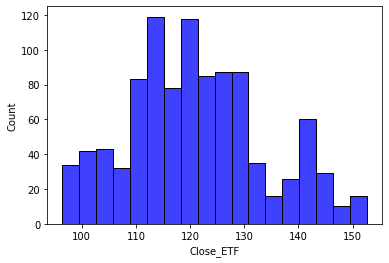

In [ ]:
sns.histplot(data['Close_ETF'],color='b')

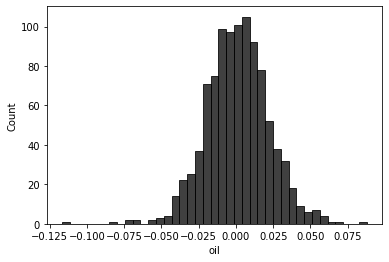

In [ ]:
sns.histplot(data['oil'],color='k')

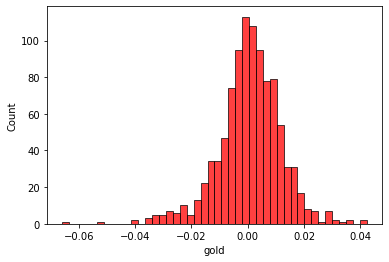

In [ ]:
sns.histplot(data['gold'],color='r')

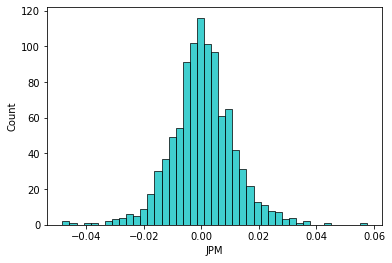

In [ ]:
sns.histplot(data['JPM'],color='c')

*Histograms give us the basic idea about the distribution of values of the variable*

*2)A time series plot for each column*

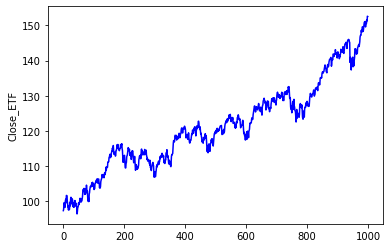

In [ ]:
sns.lineplot(x=np.arange(0,1000,1),y=data['Close_ETF'],color='b')

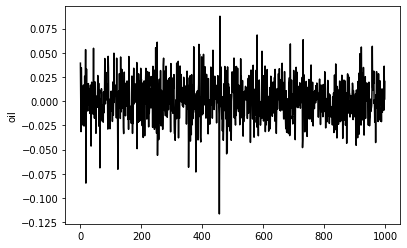

In [ ]:
sns.lineplot(x=np.arange(0,1000,1),y=data['oil'],color='k')

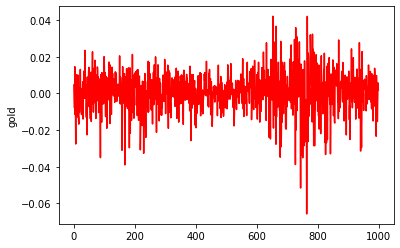

In [ ]:
sns.lineplot(x=np.arange(0,1000,1),y=data['gold'],color='r')

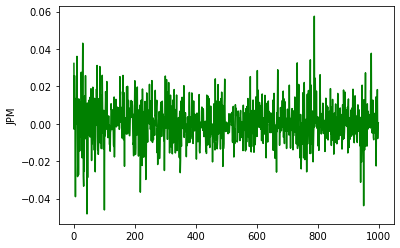

In [ ]:
sns.lineplot(x=np.arange(0,1000,1),y=data['JPM'],color='g')

*Time series plots give us the change in the random variable over time*

*To get the time series plot of the whole data we need to normalize the data as the scale of random variable ETF is a lot higher when compared to the others.
We can do the normalizing by subtracting the mean of the variables from them respectively and dividing by their standard deviations. So, by normalizing the data we can get a time series plot as follows:*

*3)A time series plot for all four columns*

In [ ]:
norm_data=(data-data.mean())/data.std()

In [ ]:
norm_data.describe()

,Close_ETF,oil,gold,JPM
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-7.173373e-15,2.264855e-17,-6.550316e-18,-4.802582e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.967651e+00,-5.573566e+00,-5.887787e+00,-4.424900e+00
25%,-6.820287e-01,-6.395836e-01,-4.852799e-01,-5.508521e-01
50%,-7.979115e-02,1.009238e-02,3.248755e-02,-1.313173e-02
75%,5.994162e-01,6.280565e-01,6.040418e-01,5.841500e-01
max,2.503386e+00,4.110214e+00,3.679295e+00,5.169428e+00


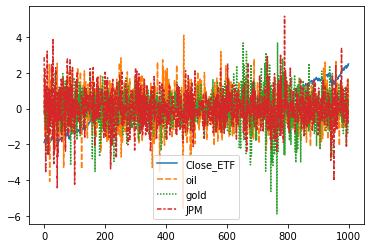

In [ ]:
sns.lineplot(data=norm_data)

*4)	Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively*

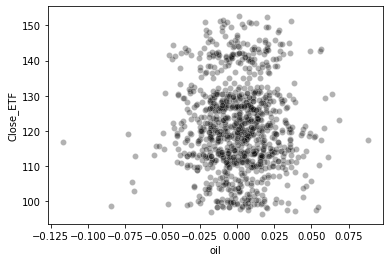

In [ ]:
sns.scatterplot(y=data['Close_ETF'],x=data['oil'],color='k',alpha=0.3)

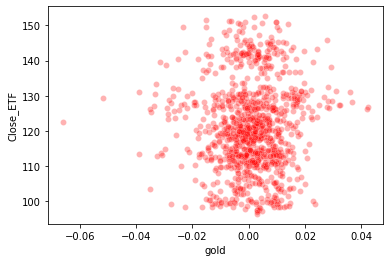

In [ ]:
sns.scatterplot(y=data['Close_ETF'],x=data['gold'],color='r',alpha=0.3)

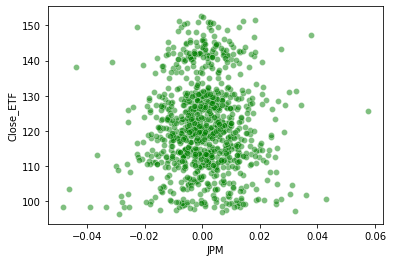

In [ ]:
sns.scatterplot(y=data['Close_ETF'],x=data['JPM'],color='g',alpha=0.5)

*Just by looking at the scatter plots we cannot say any relationship between the variables and ETF. There seems to be any visible relationship. From the above plots we can say that they aren’t linearly related.*

**Part 3: What distribution does your data follow**

*The Part 3 of the project deals with the distribution of the variables and forming the hypotheses for testing for normality. Seaborn library was used to plot the distribution of the variables using distplot method and chi-square test was implemented with significance level 0.1 for normality. The results of the plots and chi-square test are as follow:*

*Assuming that all the variables follow normal distribution*

*Distribution Plots*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


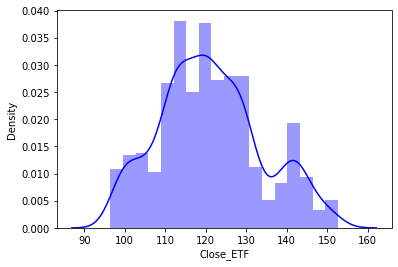

In [ ]:
sns.distplot(data['Close_ETF'],color='b',kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


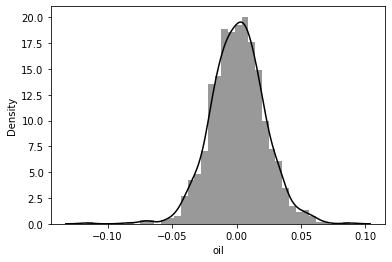

In [ ]:
sns.distplot(data['oil'],color='k',kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


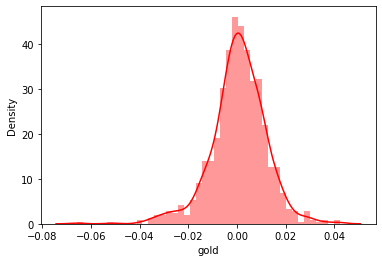

In [ ]:
sns.distplot(data['gold'],color='r',kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


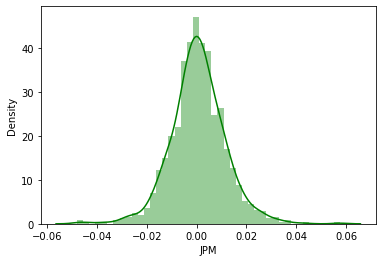

In [ ]:
sns.distplot(data['JPM'],color='g',kde=True)

*From the distribution plots we can say that almost all the 4 variables follow normal distribution but lets check the normality with a hypothesis test*

*Chisquare Normality Test*

**H0 : p-value < 0.1**

**H1 : Not H0**  

In [ ]:
from scipy.stats import chisquare

In [ ]:
statisticc,pvaluec=chisquare(np.array(data['Close_ETF']))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'Not Normal')

2.424399027686918e-10 Not Normal


In [ ]:
statisticc,pvaluec=chisquare(np.array(norm_data['Close_ETF']))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'--')

Probably Normal


In [ ]:
statisticc,pvaluec=chisquare(np.array(data['oil']))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'--')

Probably Normal


In [ ]:
statisticc,pvaluec=chisquare(np.array(data['gold']))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'--')

Probably Normal


In [ ]:
statisticc,pvaluec=chisquare(np.array(data['JPM']))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'--')

Probably Normal


*We can observe that from the distribution plots and also the chisquare normality test that except Close_ETF remaining three variables approximately follow the normal distribution*

**Part 4: Break your data into small groups and let them discuss the importance of the Central Limit Theorem**

*Part 4 of the project is completely based on the central limit theorem and the significance of it. The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold. Here the data satisfies the condition for central limit theorem. So, lets explore the significance of the central limit theorem.*

*Consider the ETF column (1000 values) as the population (x)*

*1)Calculate the mean μ_x  and the standard deviation σ_x  of the population*

In [ ]:
meanx=np.mean(data['Close_ETF'])
print('The mean of Population Close_ETF is',meanx)
stdx=np.std(data['Close_ETF'])
print('The standard deviation of Population Close_ETF is',stdx)

The mean of Population Close_ETF is 121.1529600120001
The standard deviation of Population Close_ETF is 12.563503845944297


*2)	Break the population into 50 groups sequentially and each group includes 20 values*

In [ ]:
#Population
p=list(data['Close_ETF'])
#print(p)
len(p)

1000

In [ ]:
px=p
samp=[[]]*50
import random
for i in range(int(len(p)/20)):
  samp[i]=random.sample(p,20)
  #print(samp)
  pi=samp[i]
  px=[k for k in px if k not in pi]

*Calculate the sample mean (¯x) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., use the histogram to assess the normality of the data consisting of these sample means.*

In [ ]:
for i in range(int(len(p)/20)):
  print('The mean of sample',i+1,'is',np.mean(samp[i]))

The mean of sample 1 is 122.2140007
The mean of sample 2 is 122.69400055000001
The mean of sample 3 is 119.61749995
The mean of sample 4 is 121.17299874999999
The mean of sample 5 is 118.13200035000003
The mean of sample 6 is 116.78849989999999
The mean of sample 7 is 125.58949885000001
The mean of sample 8 is 121.90600045000001
The mean of sample 9 is 117.23600015
The mean of sample 10 is 121.71900130000002
The mean of sample 11 is 118.8440009
The mean of sample 12 is 126.09500125
The mean of sample 13 is 118.74999995
The mean of sample 14 is 122.64449925
The mean of sample 15 is 121.18500014999998
The mean of sample 16 is 119.74100095000001
The mean of sample 17 is 123.5690003
The mean of sample 18 is 118.54849970000001
The mean of sample 19 is 119.50250009999999
The mean of sample 20 is 116.29249909999999
The mean of sample 21 is 120.54500010000001
The mean of sample 22 is 117.17499959999998
The mean of sample 23 is 118.31200064999999
The mean of sample 24 is 120.15799940000002
The 

In [ ]:
sample_means=[]
for i in range(50):
  sample_means.append(np.mean(samp[i]))

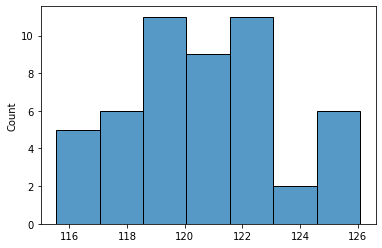

In [ ]:
sns.histplot(sample_means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


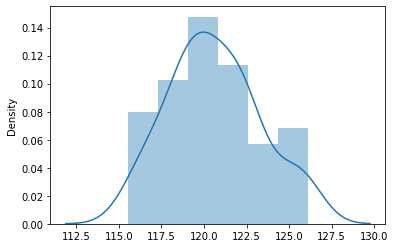

In [ ]:
sns.distplot(sample_means)

In [ ]:
statisticc,pvaluec=chisquare(np.array(sample_means))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'--')

Probably Normal


*From the distribution plot we can see that the sample means approximately follow a normal distribution, but we must check with a normality test to be sure. Use chi-square normality test for the sample means normality test, the results shown by the normality is ‘Probably normal’. By looking at the plot we can’t be sure of whether the distribution is normal or not. Here the central limit theorem comes into play, the count is 50, so the condition for central limit theorem condition is satisfied. Therefore, the distribution is made approximately normal by the central limit theorem.*

*4)Calculate the mean (〖μ〗_¯x )  and the standard deviation (σ_¯x) of the data including these sample means. Make a comparison between μ_x and μ_¯x , between ( σ_x)/√n and σ_¯x . Here, n is the number of sample means calculated from Item 3) above.*

In [ ]:
mean_sm=np.mean(sample_means)
std_sm=np.std(sample_means)
print('The mean of Sample Means is',mean_sm)
print('The standard deviation of Sample Means is',std_sm)

The mean of Sample Means is 120.60770001100002
The standard deviation of Sample Means is 2.6433153998024967


In [ ]:
Comparison={'Data':['ETF','Samples'],'Mean':[mean_ETF,mean_sm],'Standard Deviation':[std_ETF/(np.sqrt(20)),std_sm]}

In [ ]:
from tabulate import tabulate
print(tabulate(Comparison,headers='keys',tablefmt='fancy_grid',showindex=range(1,3)))

╒════╤═════════╤═════════╤══════════════════════╕
│    │ Data    │    Mean │   Standard Deviation │
╞════╪═════════╪═════════╪══════════════════════╡
│  1 │ ETF     │ 121.153 │              2.81069 │
├────┼─────────┼─────────┼──────────────────────┤
│  2 │ Samples │ 120.608 │              2.64332 │
╘════╧═════════╧═════════╧══════════════════════╛


*The above table represents the comparison of means and standard deviation of the actual Random variable and the samples.We can observe that the values obtained by sampling are nearly equal to the actual ones. So, we can state that for getting information of the population we don’t exactly need the whole population we can have the samples, and these samples give enough information about the population.*

*5)	Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?*

*The distribution of sample means is approximately normal and the results of 4 are almost similar to the actual population.Therefore the results are consistent with central limit theorem*

*6)	Break the population into 10 groups sequentially and each group includes 100 values.*

In [ ]:
px=p
samp1=[[]]*10
import random
for i in range(int(len(p)/100)):
  samp1[i]=random.sample(p,100)
  #print(samp)
  pi=samp1[i]
  px=[k for k in px if k not in pi]

*7)	Repeat Items 3) ~ 5).*

In [ ]:
for i in range(int(len(p)/100)):
  print('The mean of sample',i+1,'is',np.mean(samp1[i]))

The mean of sample 1 is 119.26419998999998
The mean of sample 2 is 121.82819989
The mean of sample 3 is 120.98240023
The mean of sample 4 is 119.63449945000002
The mean of sample 5 is 119.59860034000002
The mean of sample 6 is 120.83919952999999
The mean of sample 7 is 120.60910012000002
The mean of sample 8 is 119.49030011
The mean of sample 9 is 121.65109968
The mean of sample 10 is 123.53180003999998


In [ ]:
sample_means1=[]
for i in range(10):
  sample_means1.append(np.mean(samp1[i]))

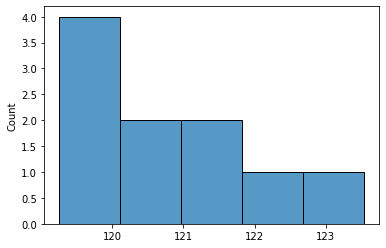

In [ ]:
sns.histplot(sample_means1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


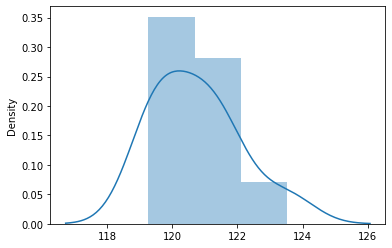

In [ ]:
sns.distplot(sample_means1)

In [ ]:
statisticc,pvaluec=chisquare(np.array(sample_means1))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'--')

Probably Normal


*From the distribution plot we can see that the sample means approximately follow a normal distribution, but we must check with a normality test to be sure. Use chi-square normality test for the sample means normality test, the results shown by the normality is ‘Probably normal’. By looking at the plot we can’t be sure of whether the distribution is normal or not. The size of the sample has become larger when compared to the previous sampling and the distribution has become more approximately normal.*

In [ ]:
mean_sm=np.mean(sample_means1)
std_sm=np.std(sample_means1)
print('The mean of Sample Means is',mean_sm)
print('The standard deviation of Sample Means is',std_sm)

The mean of Sample Means is 120.74293993799999
The standard deviation of Sample Means is 1.2711701691670636


In [ ]:
Comparison={'Data':['ETF','Samples'],'Mean':[mean_ETF,mean_sm],'Standard Deviation':[std_ETF/(np.sqrt(100)),std_sm]}
print(tabulate(Comparison,headers='keys',tablefmt='fancy_grid',showindex=range(1,3)))

╒════╤═════════╤═════════╤══════════════════════╕
│    │ Data    │    Mean │   Standard Deviation │
╞════╪═════════╪═════════╪══════════════════════╡
│  1 │ ETF     │ 121.153 │              1.25698 │
├────┼─────────┼─────────┼──────────────────────┤
│  2 │ Samples │ 120.743 │              1.27117 │
╘════╧═════════╧═════════╧══════════════════════╛


*The above table represents the comparison of means and standard deviation of the actual Random variable and the samples.We can observe that the values obtained by sampling are nearly equal to the actual ones. So, we can state that for getting information of the population we don’t exactly need the whole population we can have the samples, and these samples give enough information about the population.*

*Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?*

*The distribution of sample means is approximately normal and the results of 4 are almost similar to the actual population.Therefore the results are consistent with central limit theorem*

*8)	Generate 50 simple random samples or groups (with replacement) from the population. The size of each sample is 20, i.e., each group includes 20 values.*

In [ ]:
samp2=[[]]*50
for i in range(50):
  samp2[i]=random.sample(p,20)

In [ ]:
for i in range(50):
  print('The mean of sample',i+1,'is',np.mean(samp2[i]))

The mean of sample 1 is 122.03349985
The mean of sample 2 is 121.32849930000002
The mean of sample 3 is 124.69350084999999
The mean of sample 4 is 118.8384998
The mean of sample 5 is 118.3200009
The mean of sample 6 is 121.2665005
The mean of sample 7 is 121.04150045000002
The mean of sample 8 is 121.4960014
The mean of sample 9 is 119.2129997
The mean of sample 10 is 120.72649965000001
The mean of sample 11 is 120.59950054999999
The mean of sample 12 is 118.64300045
The mean of sample 13 is 120.30650030000001
The mean of sample 14 is 116.51599995000001
The mean of sample 15 is 119.64849964999999
The mean of sample 16 is 115.16750024999999
The mean of sample 17 is 121.71350104999996
The mean of sample 18 is 116.28449975000001
The mean of sample 19 is 119.1365001
The mean of sample 20 is 127.0639999
The mean of sample 21 is 123.70099945000001
The mean of sample 22 is 122.78799925000001
The mean of sample 23 is 121.0255009
The mean of sample 24 is 126.42150079999999
The mean of sample 25

In [ ]:
sample_means2=[]
for i in range(50):
  sample_means2.append(np.mean(samp2[i]))

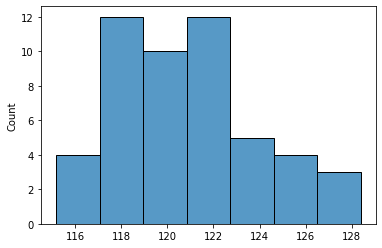

In [ ]:
sns.histplot(sample_means2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


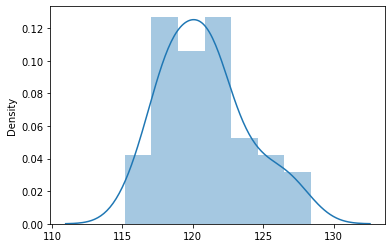

In [ ]:
sns.distplot(sample_means2)

In [ ]:
statisticc,pvaluec=chisquare(np.array(sample_means2))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'--')

Probably Normal


*From the distribution plot we can see that the sample means approximately follow a normal distribution, but we must check with a normality test to be sure. Use chi-square normality test for the sample means normality test, the results shown by the normality is ‘Probably normal’. By looking at the plot we can’t be sure of whether the distribution is normal or not. Here the central limit theorem comes into play, the sample size is 50, so the condition for central limit theorem condition is satisfied. Therefore, the distribution is made approximately normal by the central limit theorem.*

In [ ]:
mean_sm=np.mean(sample_means2)
std_sm=np.std(sample_means2)
print('The mean of Sample Means is',mean_sm)
print('The standard deviation of Sample Means is',std_sm)

The mean of Sample Means is 120.822300165
The standard deviation of Sample Means is 3.024686482894607


In [ ]:
Comparison={'Data':['ETF','Samples'],'Mean':[mean_ETF,mean_sm],'Standard Deviation':[std_ETF/(np.sqrt(20)),std_sm]}
print(tabulate(Comparison,headers='keys',tablefmt='fancy_grid',showindex=range(1,3)))

╒════╤═════════╤═════════╤══════════════════════╕
│    │ Data    │    Mean │   Standard Deviation │
╞════╪═════════╪═════════╪══════════════════════╡
│  1 │ ETF     │ 121.153 │              2.81069 │
├────┼─────────┼─────────┼──────────────────────┤
│  2 │ Samples │ 120.822 │              3.02469 │
╘════╧═════════╧═════════╧══════════════════════╛


*The above table represents the comparison of means and standard deviation of the actual Random variable and the samples.We can observe that the values obtained by sampling are nearly equal to the actual ones. So, we can state that for getting information of the population we don’t exactly need the whole population we can have the samples, and these samples give enough information about the population.*

*Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?*

*The distribution of sample means is approximately normal and the results of 4 are almost similar to the actual population.Therefore the results are consistent with central limit theorem*

*10)	Generate 10 simple random samples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.*

In [ ]:
samp3=[[]]*10
for i in range(10):
  samp3[i]=random.sample(p,100)

In [ ]:
for i in range(10):
  print('The mean of sample',i+1,'is',np.mean(samp3[i]))

The mean of sample 1 is 122.03610018999998
The mean of sample 2 is 120.78129997999999
The mean of sample 3 is 120.69599924999999
The mean of sample 4 is 122.94949936999997
The mean of sample 5 is 119.83999979000001
The mean of sample 6 is 120.63059987000001
The mean of sample 7 is 121.31330049999998
The mean of sample 8 is 121.57349993999998
The mean of sample 9 is 120.5484002
The mean of sample 10 is 120.1482998


In [ ]:
sample_means3=[]
for i in range(10):
  sample_means3.append(np.mean(samp3[i]))

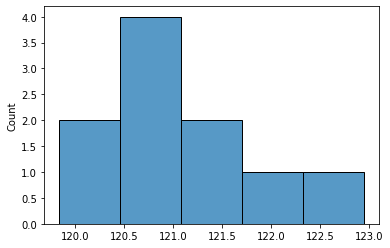

In [ ]:
sns.histplot(sample_means3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


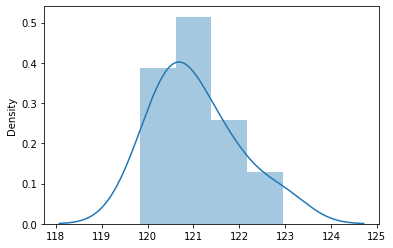

In [ ]:
sns.distplot(sample_means3)

In [ ]:
statisticc,pvaluec=chisquare(np.array(sample_means3))
if pvaluec >0.1:
  print("Probably Normal")
else:
  print(pvaluec,'--')

Probably Normal


*From the distribution plot we can see that the sample means approximately follow a normal distribution, but we must check with a normality test to be sure. Use chi-square normality test for the sample means normality test, the results shown by the normality is ‘Probably normal’. By looking at the plot we can’t be sure of whether the distribution is normal or not. The size of the sample has become larger when compared to the previous sampling and the distribution has become more approximately normal.*

In [ ]:
mean_sm=np.mean(sample_means3)
std_sm=np.std(sample_means3)
print('The mean of Sample Means is',mean_sm)
print('The standard deviation of Sample Means is',std_sm)

The mean of Sample Means is 121.05169988899998
The standard deviation of Sample Means is 0.8846479924034796


In [ ]:
Comparison={'Data':['ETF','Samples'],'Mean':[mean_ETF,mean_sm],'Standard Deviation':[std_ETF/(np.sqrt(100)),std_sm]}
print(tabulate(Comparison,headers='keys',tablefmt='fancy_grid',showindex=range(1,3)))

╒════╤═════════╤═════════╤══════════════════════╕
│    │ Data    │    Mean │   Standard Deviation │
╞════╪═════════╪═════════╪══════════════════════╡
│  1 │ ETF     │ 121.153 │             1.25698  │
├────┼─────────┼─────────┼──────────────────────┤
│  2 │ Samples │ 121.052 │             0.884648 │
╘════╧═════════╧═════════╧══════════════════════╛


*The above table represents the comparison of means and standard deviation of the actual Random variable and the samples.We can observe that the values obtained by sampling are nearly equal to the actual ones. So, we can state that for getting information of the population we don’t exactly need the whole population we can have the samples, and these samples give enough information about the population.*

*Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?*

*The distribution of sample means is approximately normal and the results of 4 are almost similar to the actual population.Therefore the results are consistent with central limit theorem*

*12)	In Part 3 of the project, you have figured out the distribution of the population (the entire ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer*

*When we did sampling with a sample size of 20 the distribution plot is not as good as a normal distribution but because of the count it is approximately normal.Where as with sample size of 100 we can clearly see that the distribution plot is approximately normal which is the statement of central limit theorem.*

*By sampling differently with different sizes we can state that the sample and the sample means gives us the most information about the population. From the results obtained we can observe that these are consistent with the central limit theorem.*

**Part 5: Construct a confidence interval with your data**

*1)Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence interval of the mean μ.*

*In Part 5 we take a one random sample each from the set of samples with sizes 50 and 100 and find the confidence interval of the population mean from these samples.We then check whether the confidence intervals contains the actual population mean or not.*

In [ ]:
i=np.random.randint(0,10)
print(i)

2


In [ ]:
k=1.96*np.std(samp3[i])*0.1
l=np.mean(samp3[i])-k
u=np.mean(samp3[i])+k
print('95% Confidence interval of the population mean is (',l,u,')')

95% Confidence interval of the population mean is ( 118.2142916442747 123.17770685572528 )


*2)Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence interval of the mean μ*

In [ ]:
j=np.random.randint(0,50)
print(j)

22


In [ ]:
k=1.96*np.std(samp2[j])/(np.sqrt(50))
l1=np.mean(samp2[j])-k
u1=np.mean(samp2[j])+k
print('95% Confidence interval of the population mean is (',l1,u1,')')

95% Confidence interval of the population mean is ( 117.03456535152898 125.01643644847101 )


*3)In Part 1, you have calculated the mean μ of the population (the entire ETF column) using Excel function. Do the two intervals from 1) and 2) above include (the true value of) the mean μ? Which one is more accurate? Why?*

In [ ]:
if (l<mean_ETF<u) & (l1<mean_ETF<u1):
  print('Both the intervals contain the true value of the population mean')
else:
  print('Only one of the both or none of the confidence intervals contain the true value of the population mean')

Both the intervals contain the true value of the population mean


*We can observe that the sample with larger size i.e; 100 has smaller interval which makes it more accurate.This is because from central limit theorem we know that when the sample size is made larger the distribution tends to become more normal which in turn makes the mean more accurate.*

**Part 6: Form a hypothesis and test it with your data**

In [ ]:
from scipy import stats
from statsmodels.stats import weightstats

*The part 6 of project deals with testing different hypotheses on means and standard deviation at a significance level 0.05 . Z – test was used for the hypothesis testing of means and Chi-square test was used for testing the standard deviation.For all the tests we got the p-value lesser than the significance value which we identify as criterion for rejecting the null hypothesis. The results of the tests are as follows:*

*1)Use the same sample you picked up in Step 1) of Part 5 to test H_0:  μ=100 vs. H_a:  μ≠100 at the significance level 0.05. What’s your conclusion?*

In [ ]:
ztest,pval=weightstats.ztest(samp3[i],value=100,alternative='two-sided')
print(pval)
if pval<0.05:
  print('Reject H0')
else:
  print('Donot Reject H0')

1.797020262600604e-59
Reject H0


*We test for null hypothesis, mean = 100 which is wrong at given significance level as we have seen in the part 5 the confidence interval at 95% doesnt contain 100,so the test rejects null hypothesis*

*2)Use the same sample you picked up in Step 2) of Part 5 to test H_0:  μ=100 vs. H_a:  μ≠100 at the significance level 0.05. What’s your conclusion?*

In [ ]:
ztest,pval=weightstats.ztest(samp2[j],value=100,alternative='two-sided')
print(pval)
if pval<0.05:
  print('Reject H0')
else:
  print('Donot Reject H0')

1.9489668127764096e-10
Reject H0


*We test for null hypothesis, mean = 100 which is wrong at given significance level as we have seen in the part 5 the confidence interval at 95% doesnt contain 100,so the test rejects null hypothesis*

*3)Use the same sample you picked up in Step 2) of Part 5 to test H_0:  σ=15   vs. H_a:  σ≠15 at the significance level 0.05. What’s your conclusion?*

In [ ]:
# We use Chi Square two tailed test
x2=19/225*(np.std(samp2[j]))**2
a=chi2.ppf(0.025,19)
b=chi2.ppf(0.975,19)
if(x2<b or x2>a):
  print('Reject H0')
else:
  print('Fail to reject H0')

Reject H0


In [ ]:
x2

17.505655310804748

*We test for null hypothesis, std = 15 which is wrong at significance level 0.05,so the test rejects null hypothesis*

*4)Use the same sample you picked up in Step 2) of Part 5 to test H_0:  σ=15   vs. H_a:  σ<15 at the significance level 0.05. What’s your conclusion?*

In [ ]:
#p=stats.distributions.chi2.sf(x2, 19)
if x2<chi2.ppf(0.95,19):
  print('Reject H0')
else:
  print('Fail to Reject H0')

Reject H0


*We test for null hypothesis, std = 15 which is wrong at significance level 0.05,so the test rejects null hypothesis*

**Part 7: Compare your data with a different data set**

*Till now we were working on the ETF variable completely.In the part 7 we test the hypotheses on different data.We consider ‘Oil ’ and ‘Gold’ variable as the samples and we perform different hypotheses testing on these samples.We use a t-test for two samples to check whether the means of two sample are equal or not. We consider subtracting one sample from another and check whether the mean is equal to zero or not .We use a t-test for one sample to test it.And the last hypothesis we like to test is the variance test.We use a F test to check the variances.Lets look at the results of the tests.The results of all the tests were ‘Fail to reject H0.' Lets test the hypotheses now one by one.*

*1)	Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.*

**H0: Means are equal**


**H1: Not H0**

In [ ]:
samp_gold=data['gold']
m_sg=np.mean(samp_gold)

In [ ]:
samp_oil=data['oil']
m_oil=np.mean(samp_oil)

In [ ]:
sp=np.sqrt(((len(samp_gold)-1)*np.std(samp_gold)**2)+((len(samp_oil)-1)*np.std(samp_oil)**2)/(2*len(samp_gold)-2))

In [ ]:
tstat=(m_sg-m_oil)/(sp*np.sqrt(2/len(samp_gold)))
print(tstat)

-0.023003007151837184


In [ ]:
t_s=t.ppf(0.025,18)

In [ ]:
if np.absolute(tstat)>np.absolute(t_s):
  print('Reject H0')
else:
  print('Fail to reject H0')

Fail to reject H0


In [ ]:
zstat,pval=weightstats.ztest(samp_gold,samp_oil,alternative='two-sided',usevar='pooled',value=0)

In [ ]:
zstat

-0.48536661382360874

In [ ]:
pval

0.6274163105067022

In [ ]:
if(pval<0.05):
  print('Reject H0')
else:
  print('Fail to reject H0')

Fail to reject H0


*At such smaller significance level the means are almost equal : they arent exactly equal but when we consider smaller significance level we can consider them as equal.So, the test cannot reject H0.*

*2)	Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.*

**H0: No difference in means**

**H1: Not H0**

In [ ]:
samp_go=data['oil']-data['gold']

In [ ]:
samp_gomean=samp_go.mean()
print(samp_gomean)

0.0003671994117470015


In [ ]:
tstati,pv=ttest_1samp(samp_go,0)

In [ ]:
pv

0.5884002009146817

In [ ]:
if(pv>0.05):
  print('Fail to Reject H0')
else:
  print('Reject H0')

Fail to Reject H0


*At such smaller significance level the means are almost equal : they arent exactly equal but when we consider smaller significance level we can consider them as equal.So, the test cannot reject H0.*

*3)	Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviations in the significance level 0.05.*

**H0: Both variances are equal**

**H1: Not H0**

In [ ]:
fstat=(data['gold'].std()/data['oil'].std())**2

In [ ]:
p=f.sf(fstat,999,999)
if(p<0.05):
  print('Reject H0')
else:
  print('Fail to reject H0')

Fail to reject H0


*At such smaller significance level the standard deviations are almost equal : they arent exactly equal but when we consider smaller significance level we can consider them as equal.So, the test cannot reject H0.*

**Part 8: Fitting the line to the data**

*1)	Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the scatter plot?*

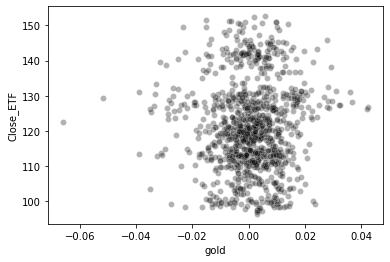

In [ ]:
sns.scatterplot(y=data['Close_ETF'],x=data['gold'],color='k',alpha=0.3)

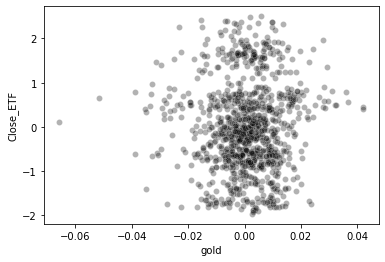

In [ ]:
sns.scatterplot(y=norm_data['Close_ETF'],x=data['gold'],color='k',alpha=0.3)

*There isnt much linear correlation between the dependent and independent variables*

*2)	Calculate the coefficient of correlation between ETF and Gold and interpret it.*

In [ ]:
cf=np.corrcoef(y=data['Close_ETF'],x=data['gold'])
print(cf)
print(cf[0][1])

[[1.         0.02299557]
 [0.02299557 1.        ]]
0.02299557007605463


*We can observe from the correlation coeff matrix that the correlation is very less*

*3)	Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? How to interpret them?*

In [ ]:
x=data['gold']
y=data['Close_ETF']
x_new=np.c_[np.ones((len(x),1)),x]
a,b=np.linalg.lstsq(x_new,y,rcond=None)[0]
print(a,b)

121.13598849889823 25.604389324427355


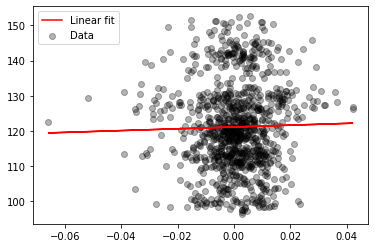

In [ ]:
y_=a+b*x
fig=plt.figure()
ax=fig.subplots()
ax.plot(x,y_,c='r',alpha=1,label='Linear fit')
ax.scatter(x,y,c='k',alpha=0.3,label='Data')
ax.legend()
plt.show()

*The above plot shows the linear fitting on the data. The data above isn’t not normalised.Lets try finding correlation and linear fit with the normalised data.*

In [ ]:
x=norm_data['gold']
y=norm_data['Close_ETF']
x_new=np.c_[np.ones((len(x),1)),x]
a,b=np.linalg.lstsq(x_new,y,rcond=None)[0]
print(a,b)

-7.485096955005528e-15 0.02299557007605461


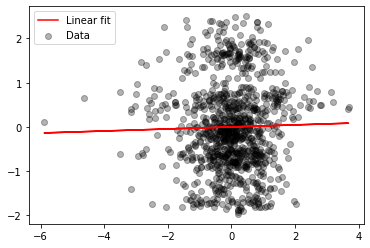

In [ ]:
y_=a+b*x
fig=plt.figure()
ax=fig.subplots()
ax.plot(x,y_,c='r',alpha=1,label='Linear fit')
ax.scatter(x,y,c='k',alpha=0.3,label='Data')
ax.legend()
plt.show()

*There is no good amount of correlation between the variables for a line to fit them exactly.*

*4)Conduct a two-tailed t-test with〖 H〗_0:  β_1=0. What is the P-value of the test? Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01? Why or why not?*




**H0:B1=0**



**H1: Not H0**

In [ ]:
sxx=np.std(data['gold'])**2
syy=np.std(data['Close_ETF'])**2
sxy=np.cov(data['Close_ETF'],data['gold'])[0][1]
b=sxy/sxx
s=np.sqrt((syy-sxy)/998)
se=s/np.sqrt(sxx)
tv=b/se

In [ ]:
tv

0.7271909277566622

In [ ]:
r=cf[0][1]

In [ ]:
tst=r*(np.sqrt(998/(1-(r**2))))

In [ ]:
tst

0.7266483774835961

In [ ]:
pp=t.sf(tst,999)*2
pp

0.4676116100849137

In [ ]:
pt=t.sf(tv,999)*2
pt

0.4672793764302384

*Here the t critical value is 1.9623 or -1.9623*

In [ ]:
if (pv<0.01):
  print('Reject H0')
else:
  print('Fail to reject H0')

Fail to reject H0


In [ ]:
if(tst<-1.9623 or tst>1.9623):
  print('Reject H0')
else:
  print('Fail to reject H0')

Fail to reject H0


*From the plots that we observe above we can say that there is no good correlation between them and at the significance level 0.05 we can consider that there is no linear correlation.So the test fails to reject H0*

*5)	Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why not?*

In [ ]:
cd=r2_score(data['Close_ETF'],data['gold'])
print('Coefficient of Determination is',cd)

Coefficient of Determination is -92.99113815628421


*Finding the coefficient of determination on the actual data doesnt give any logical result as the ETF column scale is very high so we can find the coefficient of determination using the normalized data which makes more sense*

In [ ]:
cd=r2_score(norm_data['Close_ETF'],norm_data['gold'])
print('Coefficient of Determination is',cd)

Coefficient of Determination is -0.9540088598478909


*The coefficient of determination is negative as we tried a linear fit where the correlation is not linear.*

In [ ]:
cd=r2_score(norm_data['Close_ETF'],data['gold'])
print('Coefficient of Determination is',cd)

Coefficient of Determination is 0.00039131407957015973


*When the coefficient of determination is found between norm ETF and actual gold the coefficient of determination is almost null which shows that the fitting is not great and hence it isnt a good model*

*6)	What are the assumptions you made for this model fitting?*

*1.   We assumed that the relationship between x and y is linear so we tried to fit a linear model*

*2.   Residuals are independent.*

*3.   Errors are normally distributed*

*4.   Homodescacity of errors.*





*7)	Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the individual daily ETF return.*

*99% confidence interval of the mean daily ETF return*

In [ ]:
stats.norm.interval(0.99,25.60*np.mean(data['gold'])+121.136,stats.sem(25.60*data['gold']+121.136))

(121.12942814960344, 121.17650905779495)

*the 99% prediction interval of the individual daily ETF return.*

In [ ]:
stats.norm.interval(0.99,25.60*0.005127+121.136,stats.sem(25.60*data['gold']+121.136))

(121.24371074590424, 121.29079165409574)

**Part 9:Does your model predict?**

In [ ]:
columns=['oil','gold']
x=data[columns]
y=data.drop(['oil','gold','JPM'],axis=1)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x,y)

LinearRegression()

In [ ]:
y_pred=lr.predict(x)

In [ ]:
lr.score(x,y)

0.0007502966608660122

In [ ]:
adjr2=1 - ((1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

In [ ]:
print('Adjusted R-squared value is',adjr2)

Adjusted R-squared value is -0.0012542162846487237


**Part 10: Checking residuals and model selection**

In [ ]:
residuals=np.array(y)-y_pred

In [ ]:
mean_r=np.mean(residuals)
print(mean_r)

3.637978807091713e-15


*Mean is very very small shows that it is almost 0 and is consistent with our assumption that mean is 0*

In [ ]:
sum(residuals)==0

array([False])

Text(0, 0.5, 'Residuals')

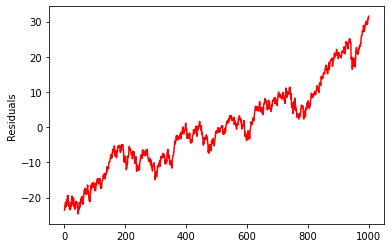

In [ ]:
plt.plot(np.linspace(0,1000,num=1000),residuals,c='r')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

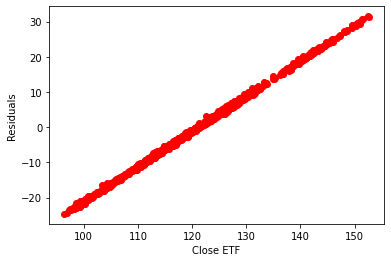

In [ ]:
plt.scatter(y,residuals,c='r')
plt.xlabel('Close ETF')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

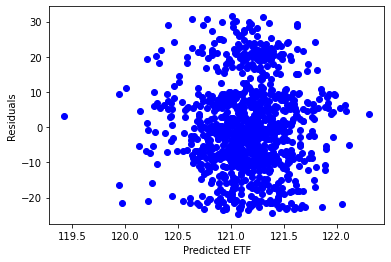

In [ ]:
plt.scatter(y_pred,residuals,c='b')
plt.xlabel('Predicted ETF')
plt.ylabel('Residuals')

*From the above residual vs fitted variable plot we can observe that there is no significant change in the variance when the fitted value is changed, so this is consistent with our assumption that the residuals have constant variance.*

*From the same plot we can also say that the residuals  independent because we cannot observe any pattern in the plot, its completely random.*

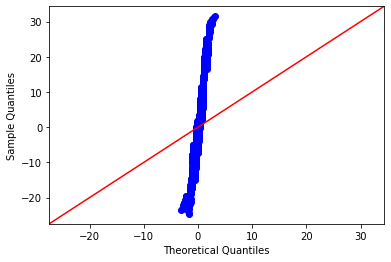

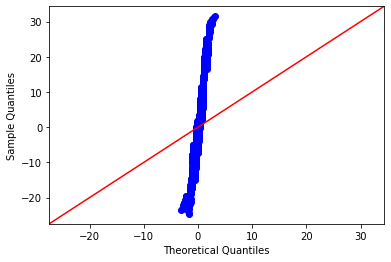

In [ ]:
sm.qqplot(residuals,dist='norm',line='45')

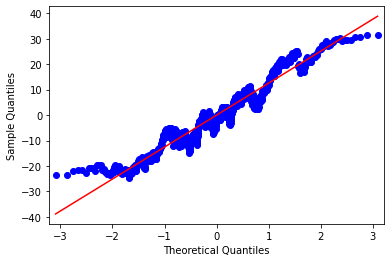

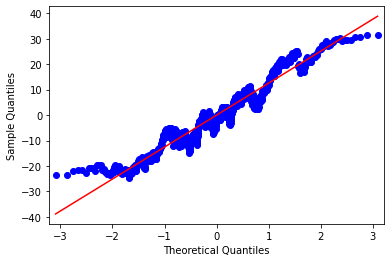

In [ ]:
sm.qqplot(residuals,dist='norm',line='s')

*From the above quantile plots we can say that the residuals aren't normally distributed as there are deviations from the line.*

*From all the above plots we can clearly observe that only 3 of our 4 assumptions are satisfied these are mean=0,constant variance and independent, we can clearly see that there is no exact normality from the qqplot.Since one of the assumptions failed we cannot consider this model as a final model to test in the real world.*

**We have considered a linear model in this case where we cannot see any linearity between the variables which is the main drawback.So if we consider a polynomial regression model we might get a better performance and reduce the residuals even more.**